# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn import linear_model
import seaborn as sns

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
unit = "Imperial"
url= f"http://api.openweathermap.org/data/2.5/weather?units={unit}&APPID={weather_api_key}"

data = []

for city in cities:
    
    query_url = f"{url}&q={city}"
    
    try:
        weather_response = requests.get(query_url).json()
        lat= weather_response["coord"]["lat"]
        lon= weather_response["coord"] ["lon"]
        temp= weather_response["main"]["temp_max"]
        hum= weather_response["main"]["humidity"]
        clo= weather_response["clouds"]["all"]
        win= weather_response["wind"]["speed"]
        country= weather_response["sys"]["country"]
        date= weather_response["dt"]
        
        
        data.append({"city": city, "lat":lat, "lon":lon, "temp":temp, "hum": hum ,
                      "clo":clo, "win":win, "country":country, "date": date}) 
        
        print(city)
        time.sleep(1.01)
    except:
        
        print("error")
        time.sleep(1.01)
        pass

ushuaia
hithadhoo
hermanus
vaini
upernavik
error
qaanaaq
hobart
bembereke
mahebourg
cape town
tuatapere
error
error
mar del plata
barrow
east london
provideniya
waingapu
tuktoyaktuk
error
longyearbyen
labuhan
karasjok
bredasdorp
kapaa
aklavik
miraflores
ovalle
atuona
nyurba
nikolskoye
huarmey
new norfolk
narsaq
georgetown
talnakh
hilo
busselton
flin flon
springbok
error
vila franca do campo
saint-philippe
error
bethel
rio gallegos
lahij
ostrovnoy
madaoua
petropavlovsk-kamchatskiy
alice springs
owando
pisco
port alfred
havoysund
butaritari
camacha
porto walter
error
saint george
ahipara
fort smith
error
albany
avarua
broome
naron
error
tual
palmer
bouar
jacksonville
carnarvon
error
muroto
erzin
riyadh
hasaki
error
hare bay
iqaluit
victoria
paralimni
jamestown
khatanga
belyy yar
lingao
college
error
brae
ponta do sol
ribeira grande
arraial do cabo
rikitea
peniche
faanui
aguimes
saskylakh
aswan
error
gloversville
benidorm
tautira
punta arenas
marzuq
puerto montt
cabedelo
norman wells
harp

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:

weather_data_pd =pd.DataFrame(data)
weather_data_pd.count()

city       558
lat        558
lon        558
temp       558
hum        558
clo        558
win        558
country    558
date       558
dtype: int64

In [5]:
weather_data_pd.describe()

,lat,lon,temp,hum,clo,win,date
count,558.000000,558.000000,558.000000,558.000000,558.000000,558.000000,5.580000e+02
mean,19.704322,19.924732,69.796470,71.437276,53.485663,7.981326,1.628888e+09
std,33.083821,88.729462,14.643672,21.521369,39.686640,5.431812,2.849626e+02
min,-54.800000,-179.166700,36.660000,8.000000,0.000000,0.000000,1.628887e+09
25%,-6.956925,-58.222525,57.910000,62.000000,8.000000,3.800000,1.628887e+09
50%,22.852150,24.637800,71.645000,77.500000,60.000000,6.910000,1.628888e+09
75%,47.672975,97.291275,79.910000,87.000000,96.750000,11.135000,1.628888e+09
max,78.218600,179.316700,105.580000,100.000000,100.000000,28.720000,1.628888e+09


In [6]:
weather_data_pd.head()

,city,lat,lon,temp,hum,clo,win,country,date
0,ushuaia,-54.8000,-68.3000,37.06,87,75,16.11,AR,1628887320
1,hithadhoo,-0.6000,73.0833,81.72,75,97,13.09,MV,1628887143
2,hermanus,-34.4187,19.2345,49.80,80,1,12.59,ZA,1628887135
3,vaini,-21.2000,-175.2000,66.36,88,40,6.91,TO,1628887191
4,upernavik,72.7868,-56.1549,43.95,95,100,6.76,GL,1628887324


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
Humidity_data_pd = weather_data_pd[(weather_data_pd["hum"] > 100)].index
                                  
Humidity_data_pd

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
new_weather_data = weather_data_pd.drop(Humidity_data_pd, inplace=False)
new_weather_data.head()

,city,lat,lon,temp,hum,clo,win,country,date
0,ushuaia,-54.8000,-68.3000,37.06,87,75,16.11,AR,1628887320
1,hithadhoo,-0.6000,73.0833,81.72,75,97,13.09,MV,1628887143
2,hermanus,-34.4187,19.2345,49.80,80,1,12.59,ZA,1628887135
3,vaini,-21.2000,-175.2000,66.36,88,40,6.91,TO,1628887191
4,upernavik,72.7868,-56.1549,43.95,95,100,6.76,GL,1628887324


In [9]:

# Export the City_Data into a csv
new_weather_data.to_csv(output_data_file) 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

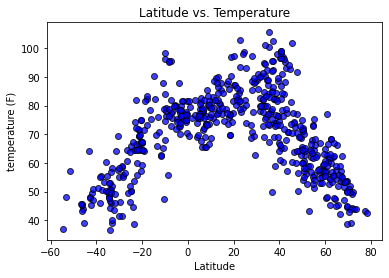

In [10]:
lats = new_weather_data["lat"]
max_temps = new_weather_data["temp"]
lats
temp
plt.scatter(lats,max_temps,
           edgecolor = "black", facecolors ="blue", marker = "o", alpha=0.75)
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("temperature (F)")


# Saveing the figure
plt.savefig("output_data/Fig1.png")

plt.show()

## Latitude vs. Humidity Plot

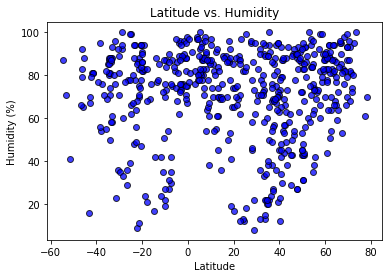

In [11]:
lats = new_weather_data["lat"]
Humidity = new_weather_data["hum"]
lats
hum
plt.scatter(lats,Humidity,
           edgecolor = "black", facecolors ="blue", marker = "o", alpha=0.75, label="city")
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Saveing the figure
#
plt.savefig("output_data/Fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

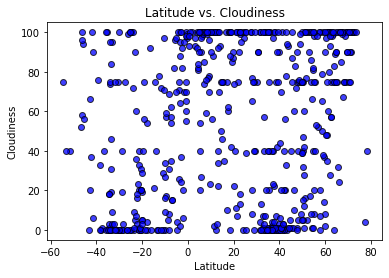

In [12]:
lats= new_weather_data["lat"]
Cloudiness= new_weather_data["clo"]
lats
clo
plt.scatter(lats,Cloudiness,
           edgecolor = "black", facecolors ="blue", marker = "o", alpha=0.75, label="city")
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Saveing the figure
plt.savefig("output_data/Fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

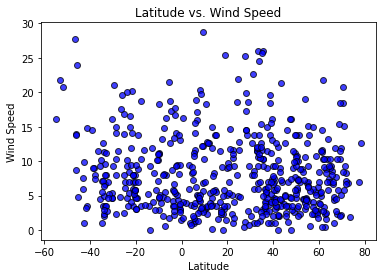

In [13]:
lats= new_weather_data["lat"]
win= new_weather_data["win"]
lats
win
plt.scatter(lats,win,
           edgecolor = "black", facecolors ="blue", marker = "o", alpha=0.75, label="city")
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")


# Saveing the figure
plt.savefig("output_data/Fig4.png")

plt.show()

## Linear Regression

In [14]:
# Create a function to create Linear Regression plots
# Add the linear regression equation and line to plot

def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [15]:
northern_hemi_df = weather_data_pd.loc[(weather_data_pd["lat"] >= 0)]
northern_hemi_df

,city,lat,lon,temp,hum,clo,win,country,date
4,upernavik,72.7868,-56.1549,43.95,95,100,6.76,GL,1628887324
5,qaanaaq,77.4840,-69.3632,43.34,61,4,7.02,GL,1628887060
7,bembereke,10.2283,2.6634,68.72,97,100,2.98,BJ,1628887329
12,barrow,71.2906,-156.7887,39.22,81,90,9.22,US,1628887339
14,provideniya,64.3833,-173.3000,47.37,68,89,7.43,RU,1628887188
...,...,...,...,...,...,...,...,...,...
552,talisay,10.2447,123.8494,77.02,94,90,6.91,PH,1628888115
553,takoradi,4.8845,-1.7554,76.51,78,100,8.43,GH,1628888117
554,botwood,49.1499,-55.3482,72.90,88,99,9.84,CA,1628888119
555,ejido,8.5514,-71.2375,73.13,87,100,3.18,VE,1628888120


In [16]:
southern_hemi_df = weather_data_pd.loc[(weather_data_pd["lat"] < 0)]
southern_hemi_df

,city,lat,lon,temp,hum,clo,win,country,date
0,ushuaia,-54.8000,-68.3000,37.06,87,75,16.11,AR,1628887320
1,hithadhoo,-0.6000,73.0833,81.72,75,97,13.09,MV,1628887143
2,hermanus,-34.4187,19.2345,49.80,80,1,12.59,ZA,1628887135
3,vaini,-21.2000,-175.2000,66.36,88,40,6.91,TO,1628887191
6,hobart,-42.8794,147.3294,48.06,70,20,5.99,AU,1628887037
...,...,...,...,...,...,...,...,...,...
524,luderitz,-26.6481,15.1594,60.85,36,0,17.60,NA,1628888071
525,florianopolis,-27.6146,-48.5012,56.43,77,75,11.50,BR,1628888073
532,marovoay,-16.1000,46.6333,75.34,76,0,3.60,MG,1628888082
546,uberlandia,-18.9186,-48.2772,81.61,24,0,6.91,BR,1628888103


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.40550316681358056


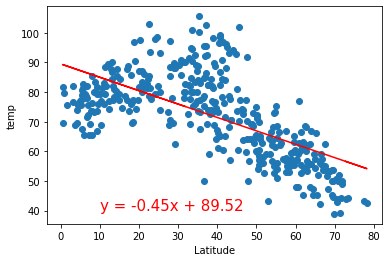

In [17]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["temp"]
plot_linear_regression(x_values, y_values , 'temp',(10,40))

In [18]:
#r-value is 0.39 which means that the relationship between the temperature and latitude is week

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6398851541775998


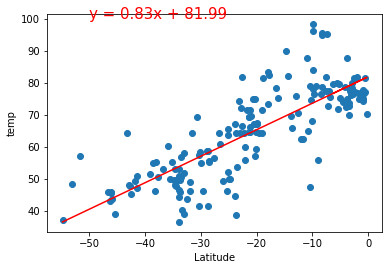

In [19]:
# Linear regression on Southen Hemisphere
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["temp"]
plot_linear_regression(x_values, y_values , 'temp',(-50,100))

In [20]:
#r-value is 0.62 which means that the relationship between the temperature and latitude is Moderate

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0005516470149966446


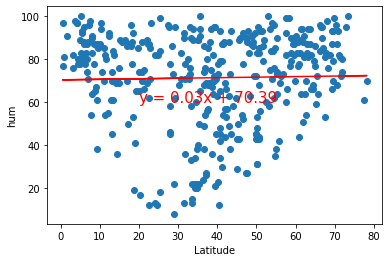

In [21]:
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["hum"]
plot_linear_regression(x_values, y_values , 'hum',(20,60))

In [22]:
#r-value is 0.006 which means that the relationship between the Humidity and latitude is very week

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0001828585468152843


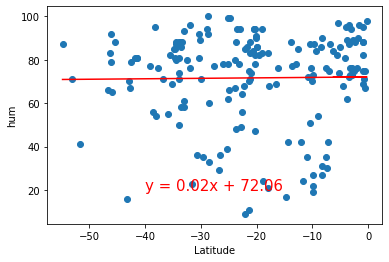

In [23]:
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["hum"]
plot_linear_regression(x_values, y_values , 'hum',(-40,20))

In [24]:
#r-value is 3.23 which means that the relationship between the Humidity and latitude is very week

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0037201750893458736


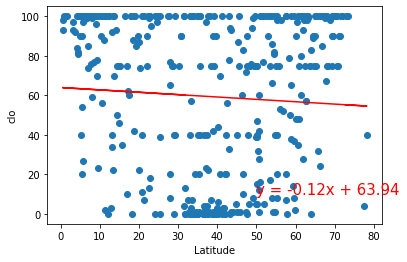

In [25]:
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["clo"]
plot_linear_regression(x_values, y_values , 'clo',(50,10))

In [26]:
#r-value is 0.004 which means that the relationship between the Cloudiness and latitude is very week, or no assosiation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.020843560747423474


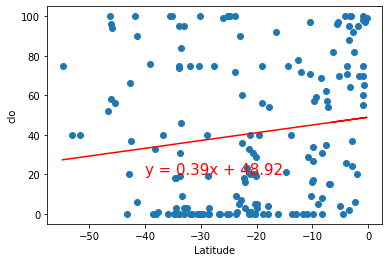

In [27]:
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["clo"]
plot_linear_regression(x_values, y_values , 'clo',(-40,20))

In [28]:
#r-value is 0.08 which means that the relationship between the Cloudiness and latitude is very week, or no assosiation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0005640943555956807


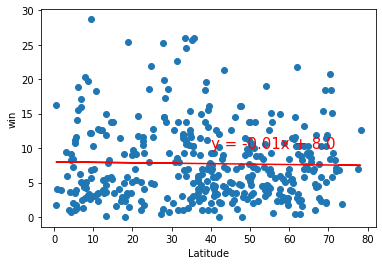

In [29]:
x_values = northern_hemi_df["lat"]
y_values = northern_hemi_df["win"]
plot_linear_regression(x_values, y_values , 'win',(40,10))

In [30]:
#r-value is 0.001 which means that the relationship between the Wind Speed and the latitude is very week, or no assosiation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02730803388138184


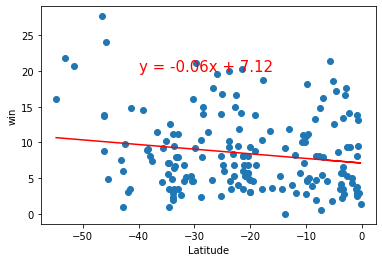

In [31]:
x_values = southern_hemi_df["lat"]
y_values = southern_hemi_df["win"]
plot_linear_regression(x_values, y_values , 'win',(-40,20))

In [ ]:
#r-value is 0.01 which means that the relationship between the Wind Speed and the latitude is very week, or no assosiation